In [23]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
path1 = r"C:\Users\abebe\Documents\George Mason University\6- SUMME 2023\Team-SkySci-Analytics\ML Application and Analysis\ML Atmospheric analysis\Atmospheric Raw Data\sept_finalized_master.csv"
path2 = r"C:\Users\abebe\Documents\George Mason University\6- SUMME 2023\Team-SkySci-Analytics\ML Application and Analysis\ML Atmospheric analysis\Atmospheric Raw Data\oct_finalized_master.csv"
path3 = r"C:\Users\abebe\Documents\George Mason University\6- SUMME 2023\Team-SkySci-Analytics\ML Application and Analysis\ML Atmospheric analysis\Atmospheric Raw Data\nov_finalized_master.csv"
path4 = r"C:\Users\abebe\Documents\George Mason University\6- SUMME 2023\Team-SkySci-Analytics\ML Application and Analysis\ML Atmospheric analysis\Atmospheric Raw Data\dec_finalized_master.csv"

september_data = pd.read_csv(path1)
october_data = pd.read_csv(path2)
november_data = pd.read_csv(path3)
december_data = pd.read_csv(path4)

In [25]:
# september_data['Month'] = 'September'
# october_data['Month'] = 'October'
# november_data['Month'] = 'November'
# december_data['Month'] = 'December'


In [26]:
master_data = pd.concat([september_data, october_data, november_data, december_data], ignore_index=True)
master_data

,Timestamp,Level,Temperature,Humidity
0,2022-09-01 00:00:00,500.0,267.635651,16.750164
1,2022-09-01 00:00:00,500.0,267.635651,16.136373
2,2022-09-01 00:00:00,500.0,267.653091,16.750164
3,2022-09-01 00:00:00,500.0,267.653091,16.136373
4,2022-09-01 00:00:00,375.0,250.282867,10.501970
...,...,...,...,...
138446,2022-12-22 23:00:00,400.0,243.098770,61.513818
138447,2022-12-22 23:00:00,375.0,239.360077,39.179960
138448,2022-12-22 23:00:00,375.0,239.360077,65.961612
138449,2022-12-22 23:00:00,375.0,239.207916,39.179960


# Calculate flight Altitude 

The altitude calculation was based on the following resources, which are also utilized for pressure conversion.

* https://www.weather.gov/media/epz/wxcalc/pressureAltitude.pdf
* https://www.weather.gov/media/epz/wxcalc/pressureConversion.pdf
* https://www.weather.gov/media/epz/wxcalc/vaporPressure.pdf
* https://www.weather.gov/media/epz/wxcalc/tempConvert.pdf


In [27]:
def calculate_altitude(Pressure):
    altitude = (1 - ((Pressure) / 1013.25) ** 0.190284) * 145366.45  #  divide presssure 100 to convert it from Pascal to hpa
    return round(altitude, 3)
master_data.loc[:, 'altitude (ft)'] = calculate_altitude(master_data['Level'])
master_data.head()

,Timestamp,Level,Temperature,Humidity,altitude (ft)
0,2022-09-01 00:00:00,500.0,267.635651,16.750164,18281.181
1,2022-09-01 00:00:00,500.0,267.635651,16.136373,18281.181
2,2022-09-01 00:00:00,500.0,267.653091,16.750164,18281.181
3,2022-09-01 00:00:00,500.0,267.653091,16.136373,18281.181
4,2022-09-01 00:00:00,375.0,250.282867,10.501970,25051.008


In [6]:
print( round(min(master_data['altitude (ft)']),2))
print( round(max(master_data['altitude (ft)']),2))


18281.18
38615.05


# Upload DewPt Data from Previus Dataset

In [29]:
Path5 = r"C:\Users\abebe\Documents\George Mason University\6- SUMME 2023\Team-SkySci-Analytics\Atmospheric Data Scraper\dewPt_data.csv"
dewptData = pd.read_csv(Path5)
dewptData

,Timestamp,Latitude,Longitude,Temperature,Humidity,Pressure,Dew Point Temperature
0,2022-09-01 00:00:00,38.530802,-77.028045,208.994675,3.544195,16999.99771,288.702240
1,2022-09-01 00:00:00,38.530802,-77.028045,208.928589,3.661933,16199.99924,288.822052
2,2022-09-01 01:00:00,38.530802,-77.028045,208.869629,3.793959,16599.99924,289.928925
3,2022-09-01 01:00:00,38.530802,-77.028045,209.144486,3.555294,17099.99771,290.157227
4,2022-09-01 02:00:00,38.530802,-77.028045,209.346085,3.433174,17099.99771,290.504166
...,...,...,...,...,...,...,...
5418,2022-12-22 21:00:00,38.530802,-77.028045,210.883087,1.978880,12999.99771,283.181366
5419,2022-12-22 22:00:00,38.530802,-77.028045,210.830719,2.104973,13099.99771,284.102203
5420,2022-12-22 22:00:00,38.530802,-77.028045,210.386291,2.221949,12099.99771,283.976562
5421,2022-12-22 23:00:00,38.530802,-77.028045,209.644226,2.564675,10999.99771,284.732758


In [30]:
dewptData['Timestamp'] = pd.to_datetime(dewptData['Timestamp'])

# Converting timestamp format 
dewptData['Timestamp'] = pd.to_datetime(dewptData['Timestamp'], format='%m/%d/%Y %H:%M').dt.strftime('%Y-%m-%d %H:%M:%S')

df = dewptData[['Timestamp', 'Dew Point Temperature' ]].rename(columns={"Dew Point Temperature": "dewPt"})
df

,Timestamp,dewPt
0,2022-09-01 00:00:00,288.702240
1,2022-09-01 00:00:00,288.822052
2,2022-09-01 01:00:00,289.928925
3,2022-09-01 01:00:00,290.157227
4,2022-09-01 02:00:00,290.504166
...,...,...
5418,2022-12-22 21:00:00,283.181366
5419,2022-12-22 22:00:00,284.102203
5420,2022-12-22 22:00:00,283.976562
5421,2022-12-22 23:00:00,284.732758


In [31]:
df.groupby('Timestamp').mean().reset_index()

,Timestamp,dewPt
0,2022-09-01 00:00:00,288.762146
1,2022-09-01 01:00:00,290.043076
2,2022-09-01 02:00:00,290.446419
3,2022-09-01 03:00:00,290.389259
4,2022-09-01 04:00:00,289.935287
...,...,...
2707,2022-12-22 19:00:00,278.242149
2708,2022-12-22 20:00:00,279.876801
2709,2022-12-22 21:00:00,282.957436
2710,2022-12-22 22:00:00,284.039383


In [32]:
master_data.head(2)

,Timestamp,Level,Temperature,Humidity,altitude (ft)
0,2022-09-01 00:00:00,500.0,267.635651,16.750164,18281.181
1,2022-09-01 00:00:00,500.0,267.635651,16.136373,18281.181


In [33]:
dewpt_dict = df.set_index('Timestamp')['dewPt'].to_dict()
# Mapping the dewpt data to master_data based on the 'Timestamp'
master_data['Dewpt'] = master_data['Timestamp'].map(dewpt_dict)
master_data

,Timestamp,Level,Temperature,Humidity,altitude (ft),Dewpt
0,2022-09-01 00:00:00,500.0,267.635651,16.750164,18281.181,288.822052
1,2022-09-01 00:00:00,500.0,267.635651,16.136373,18281.181,288.822052
2,2022-09-01 00:00:00,500.0,267.653091,16.750164,18281.181,288.822052
3,2022-09-01 00:00:00,500.0,267.653091,16.136373,18281.181,288.822052
4,2022-09-01 00:00:00,375.0,250.282867,10.501970,25051.008,288.822052
...,...,...,...,...,...,...
138446,2022-12-22 23:00:00,400.0,243.098770,61.513818,23564.347,285.333466
138447,2022-12-22 23:00:00,375.0,239.360077,39.179960,25051.008,285.333466
138448,2022-12-22 23:00:00,375.0,239.360077,65.961612,25051.008,285.333466
138449,2022-12-22 23:00:00,375.0,239.207916,39.179960,25051.008,285.333466


In [34]:
clean_data = master_data.groupby(['Timestamp', 'Level']).mean().reset_index()
clean_data

,Timestamp,Level,Temperature,Humidity,altitude (ft),Dewpt
0,2022-09-01 00:00:00,200.0,217.590439,22.580428,38615.046,288.822052
1,2022-09-01 00:00:00,225.0,221.009056,23.895230,36195.497,288.822052
2,2022-09-01 00:00:00,250.0,226.554466,19.933957,33984.704,288.822052
3,2022-09-01 00:00:00,275.0,231.823334,17.869399,31946.256,288.822052
4,2022-09-01 00:00:00,300.0,236.828835,14.600191,30052.740,288.822052
...,...,...,...,...,...,...
34627,2022-12-22 23:00:00,400.0,242.988808,46.421067,23564.347,285.333466
34628,2022-12-22 23:00:00,425.0,246.693436,45.005139,22151.114,285.333466
34629,2022-12-22 23:00:00,450.0,250.197746,46.562771,20803.669,285.333466
34630,2022-12-22 23:00:00,475.0,253.413284,51.586541,19515.537,285.333466


In [39]:
clean_data.to_csv("clean_atmospheric_data.csv", index=False)

# Quick peek on Alt and Pressure level

In [37]:
x= clean_data.Level
y=clean_data['altitude (ft)']

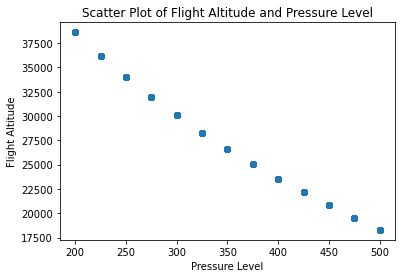

In [38]:
import matplotlib.pyplot as plt

# Assuming 'x' and 'y' are your two variables as lists, numpy arrays, or pandas Series.
plt.scatter(x, y)
plt.xlabel('Pressure Level')
plt.ylabel('Flight Altitude')
plt.title('Scatter Plot of Flight Altitude and Pressure Level')
plt.show()
